In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import re

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def check_metrics(true_val, pred_val):
    print("Accuracy: ", accuracy_score(true_val, pred_val))
    print("Roc_Auc: ", roc_auc_score(true_val, pred_val))
    print("Precision: ", precision_score(true_val, pred_val), " - процент правильно токсичных")
    print("Recall: ", recall_score(true_val, pred_val), " - процент выбранных токсичных")

data = pd.read_csv("toxic_train.csv")

test_data = pd.read_csv("toxic_test.csv")


train_texts = np.array(data['comment_text'])
for enum in range(train_texts.__len__()):
    train_texts[enum] = train_texts[enum].lower()
    train_texts[enum] = re.sub("[^0-9a-zA-Z']+", ' ', train_texts[enum])
    train_texts[enum] =  re.sub(' +', ' ', train_texts[enum])


    
test_texts = np.array(test_data['comment_text'])
for enum in range(test_texts.__len__()):
    test_texts[enum] = test_texts[enum].lower()
    test_texts[enum] = re.sub("[^0-9a-zA-Z']+", ' ', test_texts[enum])
    test_texts[enum] =  re.sub(' +', ' ', test_texts[enum])


train_target = np.array(data['is_toxic']).astype(int) * 2 - 1 
test_target = np.array(test_data['is_toxic']).astype(int) * 2 - 1

In [3]:
from optimization import GDClassifier

In [4]:
train_texts[0]

"explanation why the edits made under my username hardcore metallica fan were reverted they weren't vandalisms just closure on some gas after i voted at new york dolls fac and please don't remove the template from the talk page since i'm retired now 89 205 38 27"

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
shapes = []
res_vect = []

def vect_launcher(i):
    vect = CountVectorizer(min_df = i, stop_words = 'english')
    train_matrix = vect.fit_transform(train_texts)
    test_matrix = vect.transform(test_texts)

    shape = train_matrix.shape[1]
    
    classifier = GDClassifier(step_alpha = 3.5, step_beta = 0, l2_coef = 0)
    classifier.fit(train_matrix, train_target)
    res = classifier.predict(test_matrix)
    
    return shape, res

In [59]:
shapes = []
res_vect = []

def vect_l(i):
    vect = CountVectorizer(min_df = 3, max_df = i, stop_words = 'english')
    train_matrix = vect.fit_transform(train_texts)
    test_matrix = vect.transform(test_texts)

    shape = train_matrix.shape[1]
    
    classifier = GDClassifier(step_alpha = 3.5, step_beta = 0, l2_coef = 0)
    classifier.fit(train_matrix, train_target)
    res = classifier.predict(test_matrix)
    
    return shape, res

In [36]:
from joblib import Parallel, delayed, parallel_backend

In [37]:
parallel = Parallel(6)

In [60]:
results_l = parallel(delayed(vect_l)(i / 20) for i in range(1, 21))

In [42]:
res_vect = [res[1] for res in results]

In [43]:
shapes = [res[0] for res in results]

In [70]:
results_l[2][0]

26422

In [44]:
acc_vect = [accuracy_score(test_target, res) for res in res_vect]

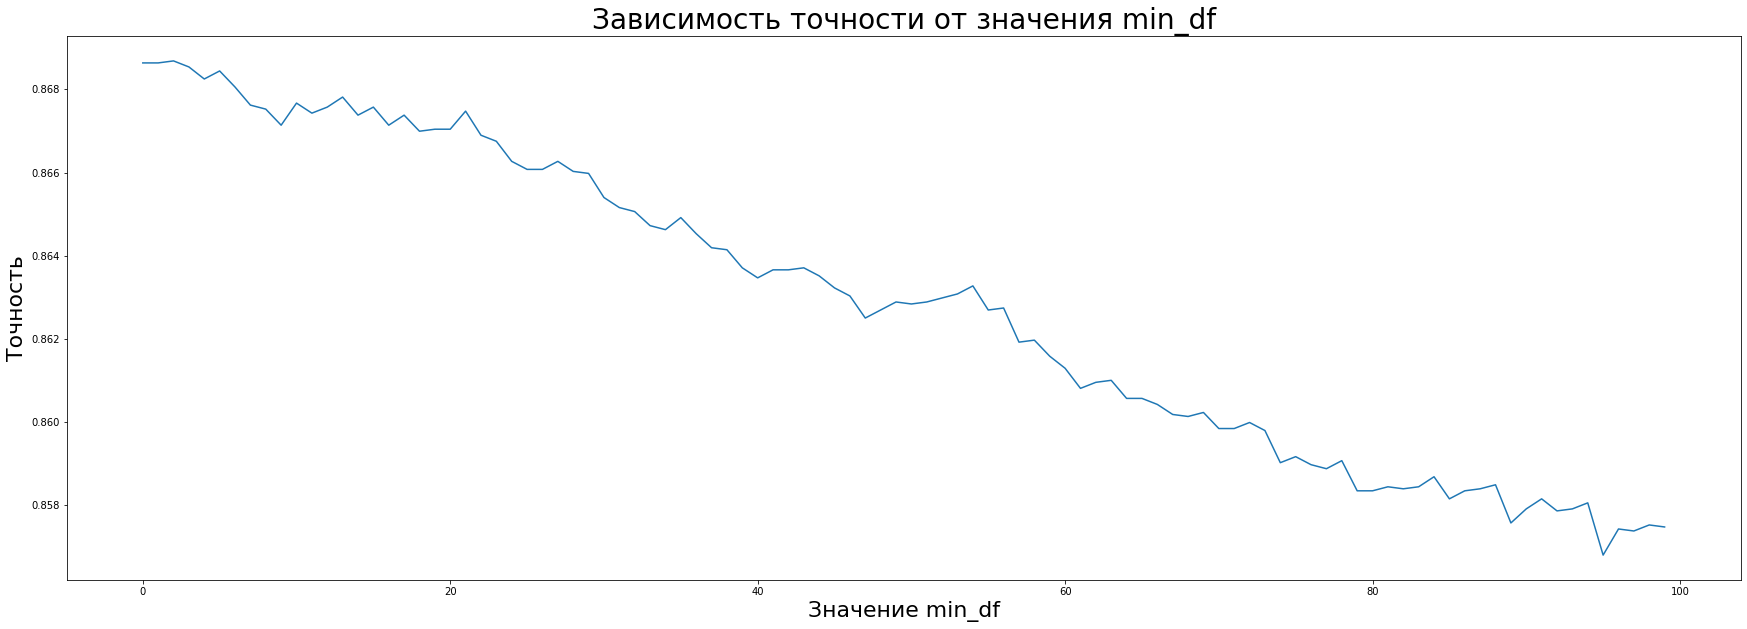

In [58]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(100), acc_vect)
plt.title("Зависимость точности от значения min_df", fontsize=28)
plt.xlabel("Значение min_df", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/min_df_associations.png")

plt.show()

In [61]:
res_l = [res[1] for res in results_l]
shapes_l = [res[0] for res in results_l]

In [63]:
acc_l = [accuracy_score(test_target, res) for res in res_l]

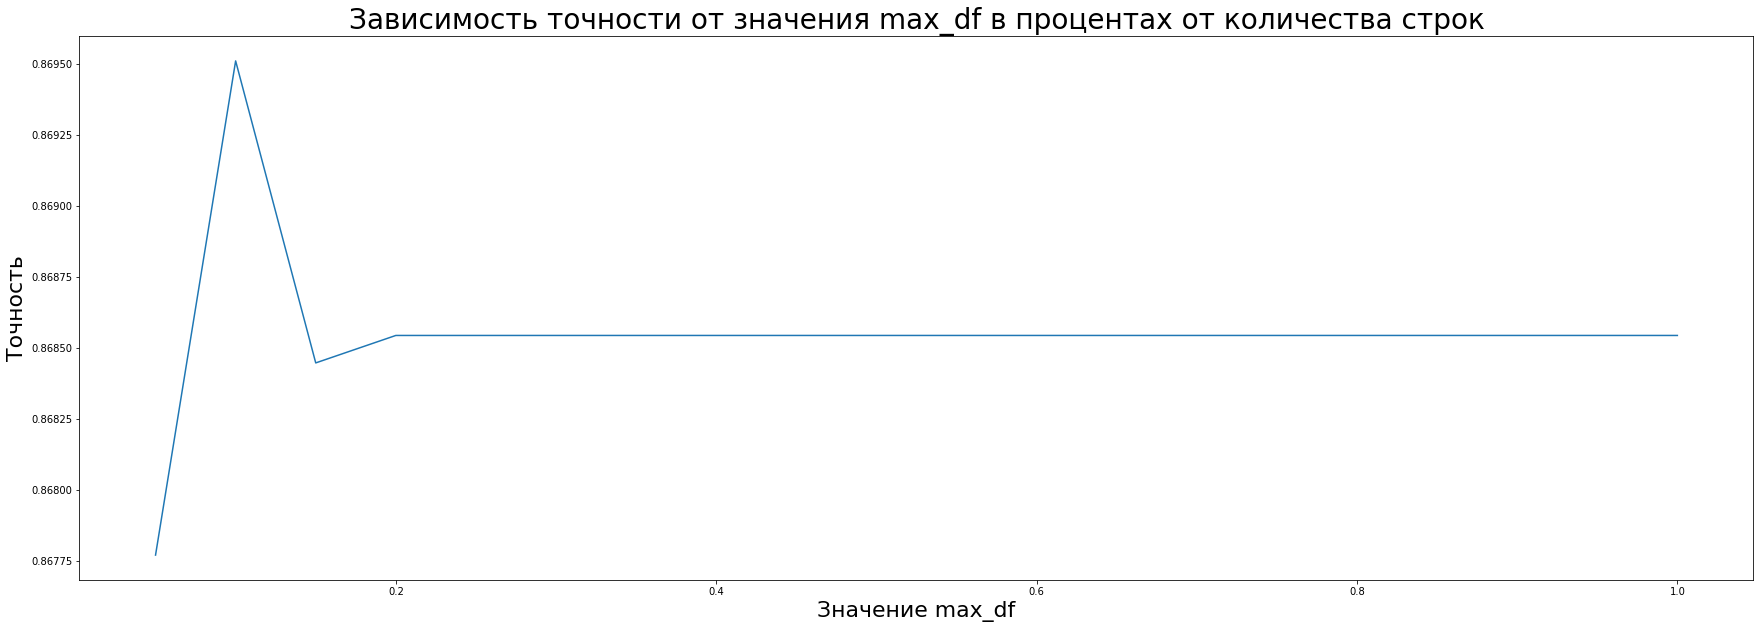

In [65]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1, 21) / 20, acc_l)
plt.title("Зависимость точности от значения max_df в процентах от количества строк", fontsize=28)
plt.xlabel("Значение max_df", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/max_df_associations.png")

plt.show()

Попробуем применить spacy алгоритм лемматизации

In [5]:
import spacy

spacy.util.set_data_path("/usr/local/lib/python3.7/site-packages/spacy/data")

In [6]:
nlp = spacy.load("en", disable = ["parser", "ner"])

В качестве примера возьмем первый элемент тренировочной выборки:

Применим ко всей выборке:

In [10]:
result = []

for item in train_texts:
    
    doc = nlp(item)
    
    result.append(" ".join([token.lemma_ for token in doc]))

In [11]:
test_result = []

for item in test_texts:
    
    doc = nlp(item)
    
    test_result.append(" ".join([token.lemma_ for token in doc]))

52061

In [51]:
import treetaggerwrapper as ttpw
tagger = ttpw.TreeTagger(TAGLANG='en', TAGDIR='tagger')
tags = tagger.tag_text(train_texts[0])
lemmas = " ".join([t.split('\t')[-1] for t in tags])

In [53]:
train_tagger_2 = [" ".join([t.split('\t')[-1] for t in tagger.tag_text(item)]) for item in train_texts]

TreeTaggerError: Time out for TreeTagger reply, enable debug / see error logs

In [ ]:
test_tagger_2 = [" ".join([t.split('\t')[-1] for t in tagger.tag_text(item)]) for item in test_texts]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(min_df = 3, stop_words = "english")

In [ ]:
train_treetagger = vect.fit_transform(train_tagger_2)
test_treetagger = vect.transform(test_tagger_2)

In [ ]:
w_tagger = []
res_tagger = []

w = np.zeros(train_treetagger.shape[1])

for i in range(50):
    classifier = GDClassifier(step_alpha = 3.5, step_beta = 0, max_iter = 100, l2_coef = 0)
    classifier.fit(train_treetagger, train_target, w_0 = w)
    
    w_tagger.append(w)
    res_tagger.append(classifier.predict(test_treetagger))
    w = classifier.get_weights()

In [ ]:
acc_tagger = [accuracy_score(test_target, res) for res in res_tagger]

In [ ]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1, 51) * 100, acc_tagger)
plt.title("Зависимость точности от числа итераций, комбинация Spacy + TreeTagger", fontsize=28)
plt.xlabel("Число итераций", fontsize=22)
plt.ylabel("Точность", fontsize=22)

#plt.savefig("Images/Spacy+TreeTagger.png")

plt.show()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
vect = CountVectorizer(min_df = 20, stop_words = "english")

In [6]:
train_matrix = vect.fit_transform(train_texts)

In [7]:
test_matrix = vect.transform(test_texts)

In [9]:
train_matrix.mean(axis=1)

matrix([[0.00347625],
        [0.00188297],
        [0.00304171],
        ...,
        [0.00376593],
        [0.00550406],
        [0.0023175 ]])

In [10]:
import pandas as pd

In [19]:
from sklearn.preprocessing import normalize

In [21]:
train_normalized = normalize(train_matrix, norm='l1', axis=0)

In [22]:
test_normalized = normalize(test_matrix, norm='l1', axis=0)

In [9]:
%time train_arr_norm = np.linalg.norm(train_arr)

CPU times: user 1.88 s, sys: 3.21 s, total: 5.09 s
Wall time: 4.73 s


In [11]:
%time test_arr_norm = np.linalg.norm(test_matrix.toarray())

CPU times: user 868 ms, sys: 703 ms, total: 1.57 s
Wall time: 1.1 s


In [12]:
from scipy import sparse

In [13]:
train_csr = sparse.csr_matrix(train_arr_norm)

In [14]:
test_csr = sparse.csr_matrix(test_arr_norm)

In [15]:
from optimization import GDClassifier

In [23]:
classifier = GDClassifier(step_alpha = 3.5, step_beta = 0, l2_coef = 0)

In [24]:
classifier.fit(train_normalized, train_target)

In [27]:
res = classifier.predict(test_normalized)

AxisError: axis 1 is out of bounds for array of dimension 1

In [28]:
accuracy_score(test_target, res)

NameError: name 'res' is not defined

<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>